# Introduction to Supervised Learning

So far we have discussed the importance of data visualization and data preprocessing. These steps are important in preparing datasets for statistical analysis and machine learning. We will now start our machine learning section of the course. The main focus of this class is on a field of machine learning called __supervised learning__ and thus we will devote a significant portion of the remaining lecture series on this topic. 

In order to understand what supervised learning is, instead of explaining the theory right from the start, we will dive straight into an example (with accompanying code)

### Supervised learning on the California housing dataset
We will be using the diabetes dataset included in the datasets module in the sklearn package. This module includes several toy datasets that have been very well-studied in the past. It is often a good idea to start learning machine learning using these datasets, and students are encouraged to try out some if not all of these datasets.

In [2]:
import sklearn.datasets
import numpy as np
import pandas as pd

cali_data = sklearn.datasets.fetch_california_housing()

description = cali_data.DESCR
cali_features = pd.DataFrame(cali_data.data)
cali_target = pd.Series(cali_data.target)

cali_features.columns = cali_data.feature_names

downloading Cal. housing from http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz to /home/cai29/scikit_learn_data


So notice that there are three parts of the dataset downloaded here: The __descriptions__, the __data__, and the __target__ variable.

In many cases the target variable is usually part of the data portion, but the sklearn package conveniently has them as separate fields for the downloaded object. So what is the target variable? Let's say it is the variable that is the target of __predictions__. The characteristics of target variables will be discussed in a section later in this lecture. But for now, let's gather some more information from the data.


The convenient part of using the datasets module is that usually datasets obtained using this API provides dataset descriptions. Let's look at this one's description:

In [3]:
print(cali_data.DESCR)
print(cali_data.feature_names)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


So this dataset has 20,640 data points The features available are house age, lat, long, and Population and etc. We know that the target variable is house value. Also judging from this fact, we can reasonably expect to have the target variable be a non-categorical, continuous variable. Let's check that by doing a unique function on the target, and see what's going on. Another way we can see the target variable is a histogram (as we've discussed in lecture 3 as a method of visualization)

[ 0.14999  0.175    0.225   ...,  4.991    5.       5.00001]


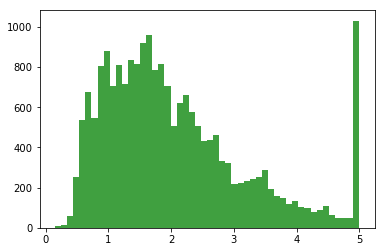

In [4]:
# unique values of target variable
print(np.unique(cali_target))

# histogram of target variable
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(cali_target, 50, facecolor='green', alpha=0.75)
plt.show()


So it seems that the target variable is a continuous variable roughly in the range of [0,5] interval(Although the big jump at 5 seems very suspicious). Why? well there seems to be a continuous distribution of data points along this interval. While this point will be elaborated upon later on, having a continuous target variable makes this a __regression__ problem, as opposed to a __classification__ problem. 

So let's run a simple regression model called __linear regression__. Where do we find this model? Well sklearn, of course! Let's import linear regression.
 

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

So now I'll separate the data into two partitions called a __training set__ and a __validation set__ (often this is denoted as the __test set__, but strictly speaking this isn't the correct term to use). The model will only be trained using the training set and then tested on the validation set, for which we already know the target variable values. This way we simulate and evaluate performance of our model a situation where the model is given new data without a target variable.

In [6]:
# Train, vaplidation split as 80% 20% of the data

index = np.random.rand(len(cali_features)) < 0.8 

train_features = cali_features[index]
valid_features = cali_features[~index]

train_target = cali_target[index]
valid_target = cali_target[~index]

Let's fit the linear regression model we created two cells up to this setup, and then estimate its predictive power on the validation set. We fit using the training set (X corresponds to features and y corresponds to the target variable, and then generating predictions using the features of the validation set.

In [7]:
# linear regression fit
model = model.fit(X=train_features, y=train_target)

# predict on validations using the validation features as input
predictions = model.predict(X=valid_features)

# generate a score for the effectiveness of model
sklearn.metrics.mean_squared_error(y_true = valid_target, y_pred=predictions)

0.52386593557241279

Now there are many different ways to compare the generated predictions, but for simplicity we will use one feature, which is the root mean-squared error, as defined below.

![mean squared error](https://www.researchgate.net/profile/Alexandros_Karatzoglou/publication/221515860/figure/fig1/AS:339586132791298@1457975051470/Figure-1-Mean-Squared-Error-formula-used-to-evaluate-the-user-model.ppm)

To explain, this is the __mean squared difference__ between the __predicted value__ and the __actual value__. Why we use this value will be explained later on, but it is a useful accuracy metric to gauge the effectiveness of a machine learning model. All that matters is that the lower this value - or in other words closer to 0 - the more this model is considered effective. 

So what does this all mean, and why did we do it in this step anyway?


## What is Supervised Learning?

Supervised learning is the process of learning an unknown relationship between a set of feature variables and a target variable.

## Our Objectives in Order

All machine learning problems are optimization problems, especially with respect to supervised learning. Now, when we optimize, we want to end up with the ideal solution - or as close as we can get - with respect to our chosen model. 

We formally define this solution using something called an objective function. The format of an objective function is usually as follows: \begin{align*}
    minimize\ OBJ(x)\\
    maximize\ OBJ(x)
\end{align*}

These objectives will be subject to some set of constraints, which serve to both change our ideal solution, and to make it more difficult to find.

Your choice in objective function is in a sense an assumption you make about the identity of your ideal solution - any two objective functions may have different ideal solutions when maximized or minimized, so care must be taken when choosing which to use (in this course, you will experience this conundrum when having to pick appropriate models for a problem).

In machine learning, we'll rarely, if ever, maximize an objective function when attempting to solve a problem. Instead of trying to maximize some metric for success, we'll instead define our objective function as an estimate of our error; in attempting to minimize this error function, we will at the same time increase the accuracy of our model, and hopefully achieve as accurate of a prediction as we can get.

## Linear Regression 

Linear regression is an abundantly simple model which may very well have come up in one of your math classes in  the past. It is approachable and serves as a starting point for many other machine learning techniques, making it ideal to start with as an introduction to Regression.

Linear Regression is quite straightfoward - you are fitting a line to your data, full stop

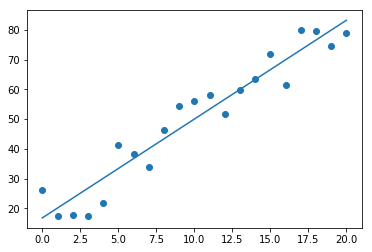

In [18]:
x = np.expand_dims(np.linspace(0,20, 21), axis=1)
error =  np.expand_dims(np.random.rand(21)  * 20, axis=1)
y = 7 + np.pi * x + error

model = LinearRegression()
model.fit(x, y)
predictions = model.predict(x)

plt.figure()
plt.scatter(x,y)
plt.plot(x, predictions)
plt.show()

A linear regression model is an equation in the form of: 
$$y = \beta_0 + \beta_1 x_1 + \ldots{} + \beta_p x_p + \epsilon$$

This establishes a number of assumptions we make when deciding to use linear regression. 

First, we assume that there is a linear relationship in the data - $\beta$, the coefficient vector, does not directly rely on any $x_i$. Instead, it holds the weights given to each $x_i$, as well as the bias term $\beta_0$. 

The second assumption we make, is that there is some amount of irreducible noise $\epsilon$, which introduces random error to our model. However, our third assumption states that this noise is normally distributed about the line drawn.

While this information is all well and good, you're probably just wondering how we go about fitting this line to our data. In this case, we need to set values for the elements of $\beta$ in order to adjust the orientation of our line. This is where things tie back in to the earlier section on objective functions. We optimize our values of $\beta$ by minimizing our objective function; in particular, linear regression makes use of an objective function known as Least Squares Error: \begin{align*}
    OBJ(x) 
    &= \Sigma{}_{i = 0}^n (y_i - \hat{y}_i)^2\\
    &= \Sigma{}_{i = 0}^n (y_i - (\beta_0 + \beta_1 x_1 + \ldots{} + \beta_p x_p))^2
\end{align*}